In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import ExcelWriter
import openpyxl

import openpyxl
import matplotlib as mpl

mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [
    r'\usepackage{textcomp}',
    r'\usepackage{wasysym}']
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.size'] = 22
mpl.rcParams['font.family'] = 'STIXGeneral'
import copy

In [68]:
'''
    Define function to compute density from ice and w.e. depths
'''
def calc_dens(path, filename):
#    data = np.genfromtxt(path + filename, delimiter='\t', skip_header=16, names=True, dtype={'names': ('Age [ka BP]', 'Age [a AD]', 'Depth ice/snow [m]', 'Depth w.e. top [m]', 'Acc rate ice [kg/m**2/a]', 'δ18O H2O [‰ SMOW]'),
#          'formats': (np.float, np.float, np.float, np.float, np.float, np.float)},)
    data = np.genfromtxt(path + filename, delimiter='\t', skip_header=17)
    
#    names = data.dtype.names
    #np.shape(data))
    depthIce = data[:,2]
    deltaDepthIce = np.diff(depthIce)
    
    depthWE = data[:,3]
    deltaDepthWE = np.diff(depthWE)

    dens = deltaDepthWE / deltaDepthIce
    d18O = data[:,5]
    #print(depthIce, deltaDepthIce)
    return depthIce, depthWE, d18O


In [69]:
'''
    Use above function to calculate densities for all B-cores.
'''

#dens = []
path = "../Data/datasets/B_cores_AWI/Densities/"
filename = "B16_2_acc_rate_d18O.tab"#, "B17_2_acc_rate_d18O.tab", "B18_2_acc_rate_d18O.tab", "B19_2_acc_rate_d18O.tab", "B20_2_acc_rate_d18O.tab", "B21_2_acc_rate_d18O.tab", "B22_2_acc_rate_d18O.tab",
            #"B23_2_acc_rate_d18O.tab", "B26_2_acc_rate_d18O.tab", "B27_2_acc_rate_d18O.tab", "B28_3_acc_rate_d18O.tab", "B29_2_acc_rate_d18O.tab", "B30_2_acc_rate_d18O.tab"]
#filenames = ["B16_2_acc_rate_d18O.tab", "B17_2_acc_rate_d18O.tab", "B18_2_acc_rate_d18O.tab", "B21_2_acc_rate_d18O.tab"]
filenames_chosen = filenames_all

#for file in filenames_chosen:
#    dens.append(calc_dens(path, file))
dens = calc_dens(path,filename)

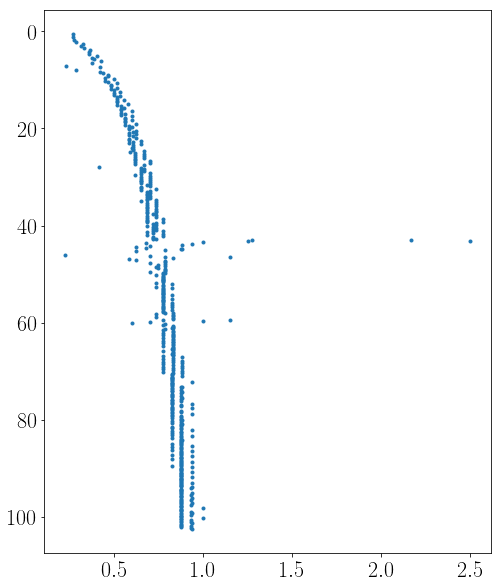

In [85]:
d = copy.deepcopy(dens[0])
d[1:] = np.diff(dens[1])/np.diff(dens[0])
d[0] = d[1] 
#print(d)

fig, ax = plt.subplots(figsize=(8,10))
ax.invert_yaxis()
ax.plot(d, dens[0],'.')

In [86]:
print(d)

[0.27272727 0.27272727 0.2745098  0.28571429 0.32608696 0.31818182
 0.33333333 0.36585366 0.35897436 0.35897436 0.40540541 0.37837838
 0.38888889 0.42857143 0.37837838 0.23333333 0.42424242 0.28846154
 0.42424242 0.4375     0.46875    0.46666667 0.4516129  0.5
 0.4516129  0.46666667 0.51724138 0.48275862 0.48275862 0.51724138
 0.48275862 0.5        0.53571429 0.5        0.5        0.53571429
 0.51851852 0.51851852 0.55555556 0.51851852 0.51851852 0.57692308
 0.51851852 0.53846154 0.55555556 0.53846154 0.53846154 0.6
 0.53846154 0.56       0.53846154 0.6        0.56       0.56
 0.6        0.56       0.56       0.625      0.56       0.58333333
 0.6        0.58333333 0.58333333 0.625      0.60869565 0.58333333
 0.625      0.58333333 0.60869565 0.625      0.58333333 0.58333333
 0.65217391 0.60869565 0.58333333 0.65217391 0.60869565 0.60869565
 0.6        0.60869565 0.60869565 0.66666667 0.59090909 0.61904762
 0.66666667 0.61904762 0.66666667 0.61904762 0.66666667 0.61904762
 0.61904762 0.7

In [45]:
len(dens[0][-1]/dens[0][-2])

522